In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

In [3]:
path  = './ml-1m'


### 1.datasets overview

movielens-1m dataset

### files

- ratings.dat
- movies.dat
- users.dat

In [4]:
os.listdir(path)


['ratings.dat', 'movies.dat', 'users.dat']

In [21]:

def load_ratings():
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies():
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding="ISO-8859-1")
    return df

def load_users():
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

###  2. X_fields conception

**continuous fields :**

- median_household_income(from zipcode) ex)66659

**categoricul fields :**

- userId ex)1
- gender ex)F
- age ex)1
- occupation ex)10
- state(from zipcode) ex) MI
- movieId ex)1193
- genres ex)Comedy
- year ex)1995

### 3. preprocess datasets

- data 1.Ratings_df

In [7]:
ratings_df = load_ratings()

In [8]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557248 entries, 0 to 557247
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     557248 non-null  int64
 1   movieId    557248 non-null  int64
 2   rating     557248 non-null  int64
 3   timestamp  557248 non-null  int64
dtypes: int64(4)
memory usage: 17.0 MB


In [12]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
557243,3423,3893,4,989903334
557244,3423,3897,5,989903334
557245,3423,1356,5,967360900
557246,3423,2301,4,967364164


In [13]:
ratings_df.drop("timestamp",axis=1 ,inplace =True)


In [14]:
ratings_df.head()


,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


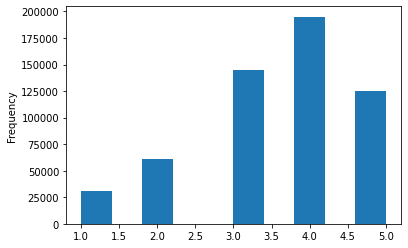

In [15]:
ratings_df.rating.plot.hist()

---

### data 2.Movies_df

In [22]:
movies_df = load_movies()
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


**field: genres**

In [24]:
genres_df = movies_df.genres.str.get_dummies(sep =  "|")
genres_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
movies_df.drop("genres",axis=1 , inplace = True)


In [26]:
movies_df = pd.concat([movies_df, genres_df],axis=1)

In [27]:
movies_df.head()

,movieId,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**field: year from title**

In [28]:
movies_df["year"] = movies_df.title.str.extract("(\(\d\d\d\d\))")


In [29]:
movies_df.year = movies_df.year.apply(lambda x : x.replace("(","").replace(")",""))


In [30]:
movies_df.year = movies_df.year.astype("int32")


In [31]:
movies_df.drop("title",axis = 1 ,inplace = True)


In [32]:
movies_df.head()


,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


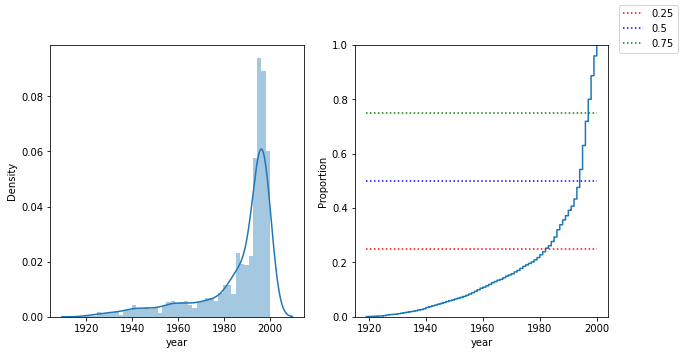

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

sns.distplot(movies_df.year, ax= ax1)
sns.ecdfplot(movies_df.year, ax =ax2)
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.25,0.25], "r:" ,label = "0.25")
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.5,0.5], "b:", label = "0.5")
ax2.plot([movies_df.year.min(),movies_df.year.max()],[0.75,0.75], "g:" , label = "0.75")
fig.legend()

In [34]:
#구간 간격

bins = list(range(1980, movies_df.year.max()+1,5))
bins.append(0)
bins = sorted(bins)
bins

[0, 1980, 1985, 1990, 1995, 2000]

In [35]:
labels = list(range(len(bins)-1))
labels = ['year_' + str(i) for i in labels]
labels

['year_0', 'year_1', 'year_2', 'year_3', 'year_4']

In [36]:
movies_df.year = pd.cut(movies_df['year'],bins = bins, right=True, labels=labels)


In [37]:
movies_df

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_3
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,year_3
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,year_3
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,year_3
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,year_4
3879,3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4
3880,3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4
3881,3951,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,year_4


In [38]:
year_df = pd.get_dummies(movies_df.year)


In [39]:
movies_df = pd.concat([movies_df, year_df], axis =1)
movies_df.drop('year', axis = 1, inplace = True)
movies_df.head()

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**data 3.users_df**

- field:gender

In [40]:
users_df = load_users()
users_df.head()

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [42]:
genders_df= pd.get_dummies(users_df.gender, prefix = 'gender')
genders_df

,gender_F,gender_M
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6035,1,0
6036,1,0
6037,1,0
6038,1,0


In [43]:
users_df = pd.concat([users_df, genders_df], axis=1)
users_df.drop('gender',axis=1, inplace=True)

In [44]:
users_df

,userId,age,Occupation,zip_code,gender_F,gender_M
0,1,1,10,48067,1,0
1,2,56,16,70072,0,1
2,3,25,15,55117,0,1
3,4,45,7,02460,0,1
4,5,25,20,55455,0,1
...,...,...,...,...,...,...
6035,6036,25,15,32603,1,0
6036,6037,45,1,76006,1,0
6037,6038,56,1,14706,1,0
6038,6039,45,0,01060,1,0


**field : age**

*  1:  "Under 18"
* 18:  "18-24"
* 25:  "25-34"
* 35:  "35-44"
* 45:  "45-49"
* 50:  "50-55"
* 56:  "56+"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


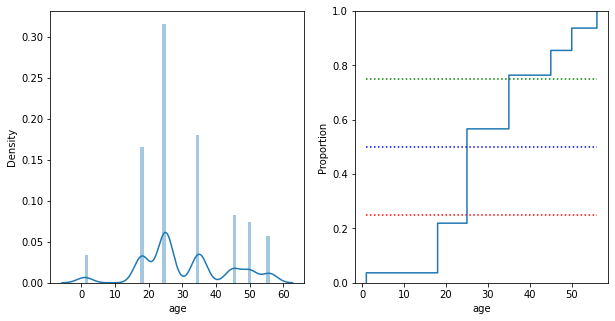

In [45]:

fig , (ax1,ax2) = plt.subplots(1,2, figsize=  (10,5))

sns.distplot(users_df.age , ax = ax1)
sns.ecdfplot(users_df.age, ax = ax2)
ax2.plot([users_df.age.min(),users_df.age.max()],[0.25,0.25], "r:" ,label = "0.25")
ax2.plot([users_df.age.min(),users_df.age.max()],[0.5,0.5], "b:", label = "0.5")
ax2.plot([users_df.age.min(),users_df.age.max()],[0.75,0.75], "g:" , label = "0.75")

In [46]:
ages_df = pd.get_dummies(users_df.age)

In [48]:
ages_df.columns = ["Under 18","18-24", "25-34","35-44","45-49", "50-55","56+"]
ages_df

,Under 18,18-24,25-34,35-44,45-49,50-55,56+
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
6035,0,0,1,0,0,0,0
6036,0,0,0,0,1,0,0
6037,0,0,0,0,0,0,1
6038,0,0,0,0,1,0,0


In [49]:
users_df = pd.concat([users_df, ages_df], axis=1)


In [50]:
users_df.drop("age", axis = 1, inplace = True)
users_df

,userId,Occupation,zip_code,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,56+
0,1,10,48067,1,0,1,0,0,0,0,0,0
1,2,16,70072,0,1,0,0,0,0,0,0,1
2,3,15,55117,0,1,0,0,1,0,0,0,0
3,4,7,02460,0,1,0,0,0,0,1,0,0
4,5,20,55455,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,15,32603,1,0,0,0,1,0,0,0,0
6036,6037,1,76006,1,0,0,0,0,0,1,0,0
6037,6038,1,14706,1,0,0,0,0,0,0,0,1
6038,6039,0,01060,1,0,0,0,0,0,1,0,0


**field : Occupation**

- Occupation is chosen from the following choices:

   - 0: "other" or not specified
   - 1: "academic/educator"
   - 2: "artist"
   - 3: "clerical/admin"
   - 4: "college/grad student"
   - 5: "customer service"
   - 6: "doctor/health care"
   - 7: "executive/managerial"
   - 8: "farmer"
   - 9: "homemaker"
   - 10: "K-12 student"
   - 11: "lawyer"
   - 12: "programmer"
   - 13: "retired"
   - 14: "sales/marketing"
   - 15: "scientist"
   - 16: "self-employed"
   - 17: "technician/engineer"
   - 18: "tradesman/craftsman"
   - 19: "unemployed"
   - 20: "writer"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


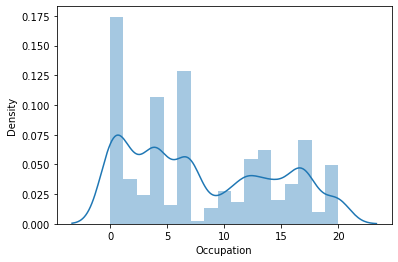

In [51]:
sns.distplot(users_df.Occupation, kde = True)

In [52]:

occupation_name = ["other",
"academic/educator",
 "artist",
"clerical/admin",
"college/grad student",
"customer service",
"doctor/health care",
"executive/managerial",
"farmer",
"homemaker",
"K-12 student",
"lawyer",
"programmer",
"retired",
"sales/marketing",
"scientist",
"self-employed",
"technician/engineer",
"tradesman/craftsman",
"unemployed",
"writer"]
occupation_df = pd.get_dummies(users_df.Occupation)

In [53]:
occupation_df.columns = occupation_name


In [54]:
occupation_df

,other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
users_df = pd.concat([users_df, occupation_df], axis=1)
users_df.drop("Occupation", axis = 1, inplace=True)
users_df

,userId,zip_code,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,1,48067,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,70072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,55117,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,02460,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,55455,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,32603,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,6037,76006,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6037,6038,14706,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,6039,01060,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### field : state from zipcode

- zipcode feature extraction

In [ ]:
! pip install uszipcode

In [60]:
from uszipcode import SearchEngine


**concat X_fields**

In [66]:
ratings_df.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [67]:
movies_df.head()

,movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
users_df.drop(columns='zip_code', inplace=True)

In [71]:
users_df.head()

,userId,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,50-55,56+,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
ratings_df = ratings_df.merge(users_df, how = "left")

In [74]:
ratings_df = ratings_df.merge(movies_df, how = 'left')

In [75]:
ratings_df

,userId,movieId,rating,gender_F,gender_M,Under 18,18-24,25-34,35-44,45-49,...,Romance,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4
0,1,1193,5,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,661,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,914,3,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,3408,4,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2355,5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557243,3423,3893,4,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
557244,3423,3897,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
557245,3423,1356,5,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
557246,3423,2301,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
#target
target = ratings_df["rating"]
ratings_df.drop("rating",inplace=True,axis=1)

In [77]:
binary_target = target >=4.0 
#4.0이하는 0 , 4.0이상은 1로 이진 분류